# Comparative Approach: Printhouse

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FULLunified_payments.csv', index_col= ('Customer Description'))
df.rename(columns=({'Amount':'Money', 'Created (UTC)':'Date'}), inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Day'] = pd.to_datetime(df['Date']).dt.day
ph = df[['id', 'Money', 'Card Issue Country', 'Date', 'Year', 'Month']]
ph

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
info@provokedmerch.com,ch_1HUImyDKUDUzYEh87JrEnXuG,60.45,US,2020-09-22 21:12:00,2020,9
info@provokedmerch.com,ch_1HUIkaDKUDUzYEh8yuiysjlH,18.20,US,2020-09-22 21:10:00,2020,9
info@provokedmerch.com,ch_1HUIhyDKUDUzYEh8gFJJTD0H,18.20,US,2020-09-22 21:07:00,2020,9
info@provokedmerch.com,ch_1HUGUkDKUDUzYEh8v6t6I2aF,285.10,US,2020-09-22 18:45:00,2020,9
info@provokedmerch.com,ch_1HUG8dDKUDUzYEh8eMPFl67r,23.20,US,2020-09-22 18:22:00,2020,9
...,...,...,...,...,...,...
User for evelyn-henson.myshopify.com,ch_15Qm0LDKUDUzYEh8dRAw98u9,17.80,US,2015-01-30 21:08:00,2015,1
User for evelyn-henson.myshopify.com,ch_15QlzfDKUDUzYEh8Kqf7DaGM,55.18,US,2015-01-30 21:07:00,2015,1
User for evelyn-henson.myshopify.com,ch_15QlzXDKUDUzYEh8q3y8xMfg,10.25,US,2015-01-30 21:07:00,2015,1


In [3]:
clients = ph.groupby('Customer Description').sum()
clients['Money'].sort_values(ascending=False).head(10)

Customer Description
User for evelyn-henson.myshopify.com               216354.80
User for marna-schindler-fine-art.myshopify.com     93588.37
User for definitivejux.myshopify.com                46484.25
support@gospelcanvas.com                            43230.03
User for metalworksart.myshopify.com                39611.96
info@provokedmerch.com                              37305.24
jenavievemklouie@gmail.com                          15371.35
User for jasonbehnke.myshopify.com                   9899.94
User for libertyinnorthkoreastore.myshopify.com      9782.00
jeff@kasuriagroup.com                                8189.11
Name: Money, dtype: float64

# Big Customers Trend from 2015 to 2020

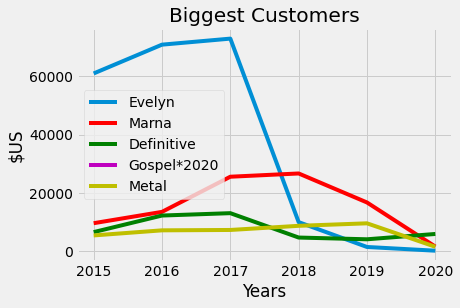

In [4]:
plt.style.use('fivethirtyeight')
dte = ['2015','2016', '2017', '2018', '2019', '2020']
bg1 = ph.loc['User for evelyn-henson.myshopify.com'].groupby('Year')['Money'].sum()
bg2 = ph.loc['User for marna-schindler-fine-art.myshopify.com'].groupby('Year')['Money'].sum()
bg3 = ph.loc['User for definitivejux.myshopify.com'].groupby('Year')['Money'].sum()
bg4 = ph.loc['support@gospelcanvas.com'].groupby('Year')['Money'].sum()
bg5 = ph.loc['User for metalworksart.myshopify.com'].groupby('Year')['Money'].sum()
plt.title('Biggest Customers')
plt.xlabel('Years')
plt.ylabel('$US')
plt.plot(dte,bg1, label='Evelyn')
plt.plot(dte,bg2, color='r', label='Marna')
plt.plot(dte,bg3, color='g', label='Definitive')
plt.plot(dte[-1],bg4, color='m', label='Gospel*2020')
plt.plot(dte,bg5, color='y', label='Metal')
plt.legend(loc='best')
plt.show()

# Money per client from 2015 to 2020

<function matplotlib.pyplot.show(close=None, block=None)>

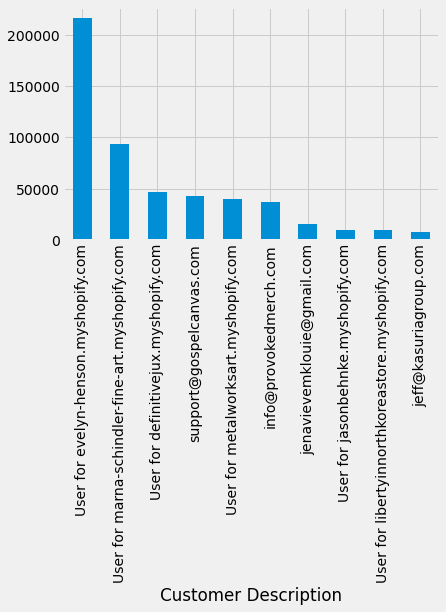

In [5]:
clients['Money'].sort_values(ascending=False).head(10).plot.bar()
plt.show

# 2015 Clients 

<AxesSubplot:xlabel='Customer Description'>

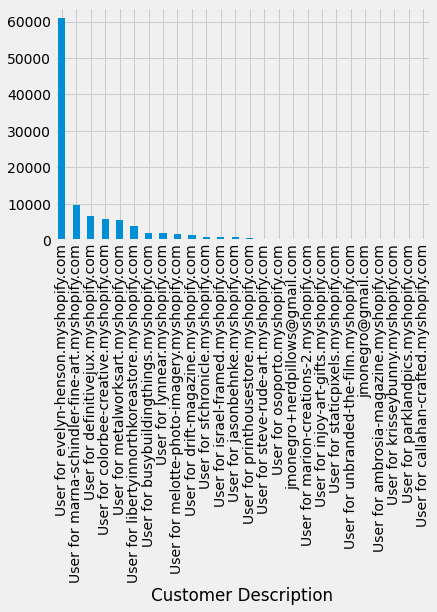

In [6]:
tf2015 = ph[(ph['Date'] > '2015-01-01') & (ph['Date'] < '2016-01-01')]
c2015 = tf2015.groupby('Customer Description').sum()
c2015['Money'].sort_values(ascending=False).plot.bar()

# 2016 Clients 

<AxesSubplot:xlabel='Customer Description'>

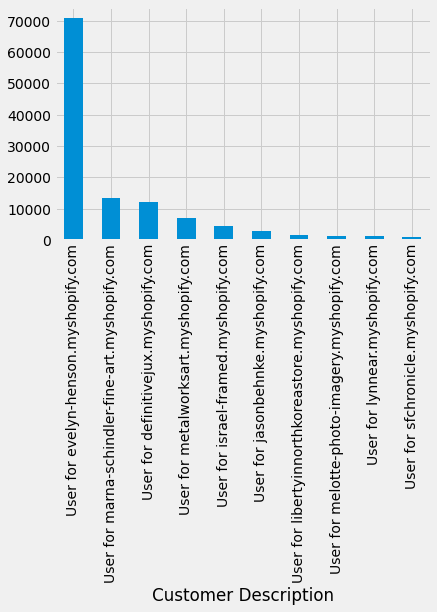

In [7]:
tf2016 = ph[(ph['Date'] > '2016-01-01') & (ph['Date'] < '2017-01-01')]
c2016 = tf2016.groupby('Customer Description').sum()
c2016['Money'].sort_values(ascending=False).head(10).plot.bar()

# 2017 Clients 

<AxesSubplot:xlabel='Customer Description'>

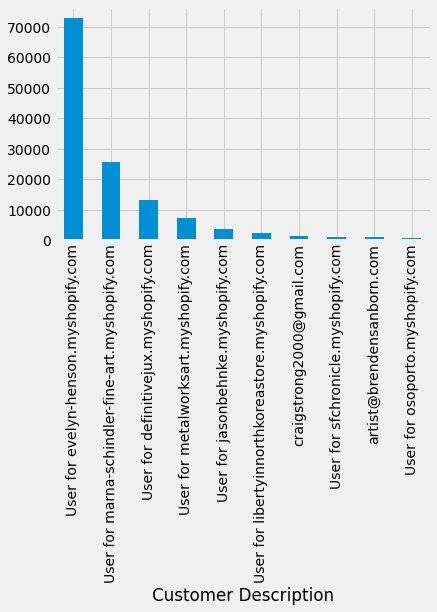

In [8]:
tf2017 = ph[(ph['Date'] > '2017-01-01') & (ph['Date'] < '2018-01-01')]
c2017 = tf2017.groupby('Customer Description').sum()
c2017['Money'].sort_values(ascending=False).head(10).plot.bar()

# 2018 Clients 

<AxesSubplot:xlabel='Customer Description'>

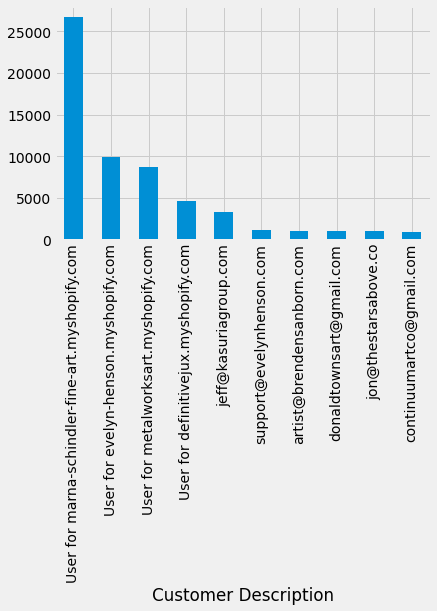

In [9]:
tf2018 = ph[(ph['Date'] > '2018-01-01') & (ph['Date'] < '2019-01-01')]
c2018 = tf2018.groupby('Customer Description').sum()
c2018['Money'].sort_values(ascending=False).head(10).plot.bar()

# 2019 Clients 

<AxesSubplot:xlabel='Customer Description'>

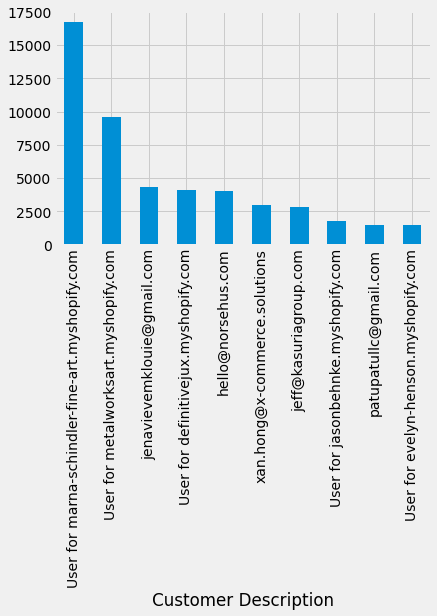

In [10]:
tf2019 = ph[(ph['Date'] > '2019-01-01') & (ph['Date'] < '2020-01-01')]
c2019 = tf2019.groupby('Customer Description').sum()
c2019['Money'].sort_values(ascending=False).head(10).plot.bar()

# 2020 Clients 

In [11]:
tf2020 = ph[(ph['Date'] > '2020-01-01') & (ph['Date'] < '2021-01-01')]
c2020 = tf2020.groupby('Customer Description').sum()
c2020['Money'].sort_values(ascending=False).head(10)

Customer Description
support@gospelcanvas.com                43230.03
info@provokedmerch.com                  37305.24
jenavievemklouie@gmail.com              11063.14
blake@blakejamieson.com                  5926.17
User for definitivejux.myshopify.com     5908.25
alisu2005@gmail.com                      3476.47
orders@loud.pictures                     3176.39
lovetoons2019@gmail.com                  2074.95
jeff@kasuriagroup.com                    2055.39
kevinhunterart@icloud.com                2033.66
Name: Money, dtype: float64

<AxesSubplot:xlabel='Customer Description'>

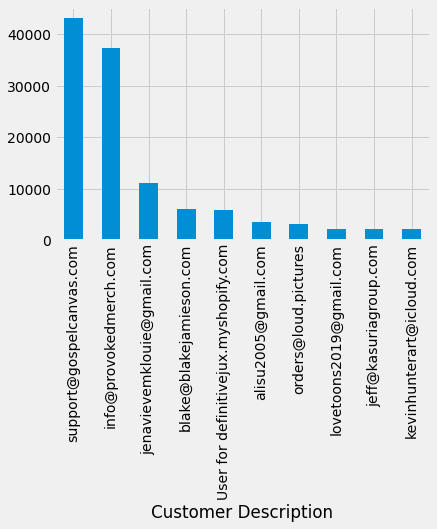

In [12]:
tf2020 = ph[(ph['Date'] > '2020-01-01') & (ph['Date'] < '2021-01-01')]
c2020 = tf2020.groupby('Customer Description').sum()
c2020['Money'].sort_values(ascending=False).head(10).plot.bar()

# Individual Customer Behavior Search Tool

In [13]:
search = 'User for libertyinnorthkoreastore.myshopify.com'

In [14]:
ph.loc[search]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
User for libertyinnorthkoreastore.myshopify.com,ch_1FPBCLDKUDUzYEh8lxP5vrVu,26.98,US,2019-10-02 17:01:00,2019,10
User for libertyinnorthkoreastore.myshopify.com,ch_1FGrvlDKUDUzYEh8nk5K4OXX,32.76,US,2019-09-09 18:49:00,2019,9
User for libertyinnorthkoreastore.myshopify.com,ch_1FF2wcDKUDUzYEh8fedWvRrO,45.65,US,2019-09-04 18:11:00,2019,9
User for libertyinnorthkoreastore.myshopify.com,ch_1F4cwXDKUDUzYEh8iVYVrCdR,49.03,US,2019-08-07 00:23:00,2019,8
User for libertyinnorthkoreastore.myshopify.com,ch_1F4DdfDKUDUzYEh8M7VtHonK,31.17,US,2019-08-05 21:22:00,2019,8
...,...,...,...,...,...,...
User for libertyinnorthkoreastore.myshopify.com,ch_15USAiDKUDUzYEh8OH0vhSt2,73.02,US,2015-02-10 00:46:00,2015,2
User for libertyinnorthkoreastore.myshopify.com,ch_15SzguDKUDUzYEh8mx34yjaR,68.94,US,2015-02-06 00:09:00,2015,2
User for libertyinnorthkoreastore.myshopify.com,ch_15S2y0DKUDUzYEh8k9CnOVfu,67.93,US,2015-02-03 09:27:00,2015,2


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Year,Month'>

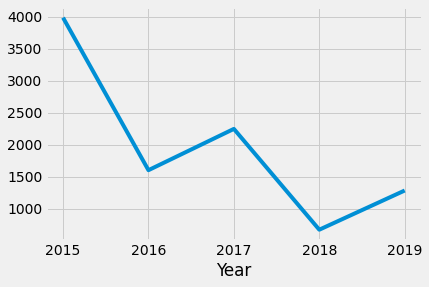

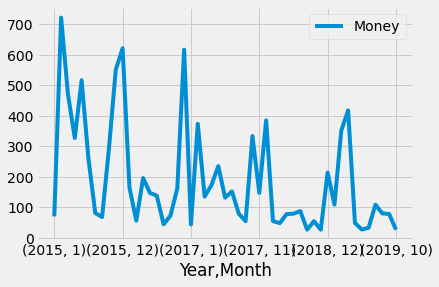

In [15]:
ph.loc[search].groupby(['Year'])['Money'].sum().plot()
ph.loc[search].groupby(['Year', 'Month']).sum().plot()

# Last Month Clients

In [16]:
lmonth = ph[(ph['Date'] > '2020-08-01') & (ph['Date'] < '2021-01-01')]
lmonth.groupby('Customer Description')['Money'].sum().sort_values(ascending=False)

Customer Description
info@provokedmerch.com                  36634.00
blake@blakejamieson.com                  4362.57
jenavievemklouie@gmail.com               3129.01
alisu2005@gmail.com                      1163.79
kevinhunterart@icloud.com                1058.26
salmedina@gmail.com                       702.34
melissa@sweetwaterdecor.com               621.47
jeff@kasuriagroup.com                     544.22
User for sfchronicle.myshopify.com        344.00
maria@printhouse.io                       341.08
contact@ayahuascaartwork.com              310.15
michalak724@gmail.com                     307.13
User for lynnear.myshopify.com            266.50
arthyped@gmail.com                        253.36
connect@manxmachina.com                   218.65
exjobless@gmail.com                       208.80
polystratus@hotmail.com                   192.44
christosart369@gmail.com                  176.82
tadprints@gmail.com                       175.86
dojoclaydon@hotmail.com                   164.50

<AxesSubplot:xlabel='Customer Description'>

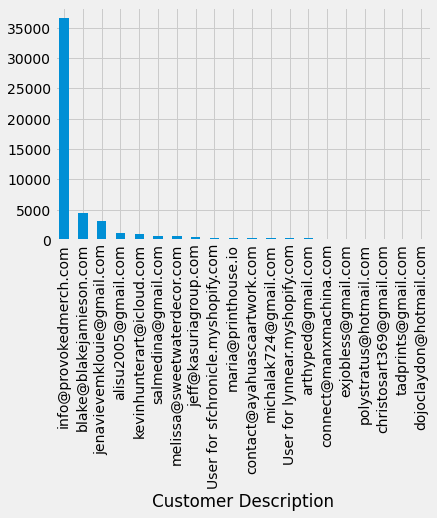

In [17]:
lmonth.groupby('Customer Description')['Money'].sum().sort_values(ascending=False).head(20).plot.bar()

# Number of Orders Approach 

## All time number of orders by client

<AxesSubplot:>

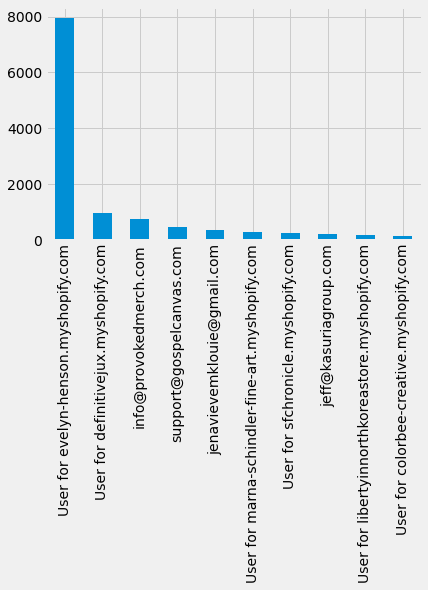

In [18]:
ph.index.value_counts().head(10).plot.bar()

In [19]:
l3month = ph[(ph['Date'] > '2020-06-01') & (ph['Date'] < '2021-01-01')]
l3month.groupby('Customer Description')['id'].count().sort_values(ascending=False)

Customer Description
info@provokedmerch.com                  773
jenavievemklouie@gmail.com              133
support@gospelcanvas.com                129
blake@blakejamieson.com                  94
User for definitivejux.myshopify.com     65
                                       ... 
elliotsun17@gmail.com                     1
e@chidwi.com                              1
doylepod4@gmail.com                       1
nutmeg@nutmegandbinky.com                 1
hello@curationery.com                     1
Name: id, Length: 75, dtype: int64

# Full List

In [20]:
fty = ph[(ph['Date'] > '2020-05-31')]
ltm = fty.groupby('Customer Description').count().sort_values('Money', ascending=False).head(40)

f100 = ltm['id'] > 100
f50 = (ltm['id'] > 50) & (ltm['id'] < 100)
f25 = (ltm['id'] > 25) & (ltm['id'] < 50)
f10 = (ltm['id'] > 10) & (ltm['id'] < 25)
f5 = (ltm['id'] > 5) & (ltm['id'] < 10)
f1 = (ltm['id'] > 0) & (ltm['id'] < 5)
f0 = (ltm['id'] > 0) & (ltm['id'] < 2)


In [21]:
ltm

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
info@provokedmerch.com,773,773,773,773,773,773
support@gospelcanvas.com,139,139,139,139,139,139
jenavievemklouie@gmail.com,133,133,133,133,133,133
blake@blakejamieson.com,94,94,94,94,94,94
User for definitivejux.myshopify.com,66,66,66,66,66,66
alisu2005@gmail.com,49,49,49,49,49,49
jeff@kasuriagroup.com,40,40,40,40,40,40
kevinhunterart@icloud.com,29,29,29,29,29,29
User for sfchronicle.myshopify.com,28,28,28,28,28,28


# Clients that made more than 100 orders in the last three months

In [22]:
ltm[f100]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
info@provokedmerch.com,773,773,773,773,773,773
support@gospelcanvas.com,139,139,139,139,139,139
jenavievemklouie@gmail.com,133,133,133,133,133,133


# Clients that made more than 50 orders in the last three months

In [23]:
ltm[f50]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
blake@blakejamieson.com,94,94,94,94,94,94
User for definitivejux.myshopify.com,66,66,66,66,66,66


# Clients that made more than 25 orders in the last three months

In [24]:
ltm[f25]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
alisu2005@gmail.com,49,49,49,49,49,49
jeff@kasuriagroup.com,40,40,40,40,40,40
kevinhunterart@icloud.com,29,29,29,29,29,29
User for sfchronicle.myshopify.com,28,28,28,28,28,28


# Clients that made more than 10 orders in the last three months

In [25]:
ltm[f10]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
melissa@sweetwaterdecor.com,22,22,22,22,22,22
contact@ayahuascaartwork.com,20,20,20,20,20,20
salmedina@gmail.com,17,17,17,17,17,17
portraitofpet@gmail.com,14,14,14,14,14,14
tadprints@gmail.com,14,14,14,14,14,14
User for lynnear.myshopify.com,14,14,14,14,14,14
theastroccult@gmail.com,11,11,11,11,11,11
dojoclaydon@hotmail.com,11,11,11,11,11,11


# Clients that made more than 5 orders in the last three months

In [26]:
ltm[f5]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
bizarropie@gmail.com,9,9,9,9,9,9
christosart369@gmail.com,8,8,8,8,8,8
andychoai@gmail.com,8,8,8,8,8,8
artistgirlie@gmail.com,7,7,7,7,7,7
aron@relatable.me,7,7,7,7,7,7
lizparkstudio@gmail.com,6,6,6,6,6,6


# Clients that made more than 1 order in the last three months

In [27]:
ltm[f1]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
shwillia12@gmail.com,4,4,4,4,4,4
vendors@cordandiron.com,4,4,4,4,4,4
b.sec.mailroom@gmail.com,4,4,4,4,4,4
connect@manxmachina.com,4,4,4,4,4,4
jodesigns1913@gmail.com,3,3,3,3,3,3
tatavartimallika@gmail.com,3,3,3,3,3,3
saas@verv.tv,3,3,3,3,3,3
brad@islandfevertradingco.com,3,3,3,3,3,3
michalak724@gmail.com,2,2,2,2,2,2


# Clients that made 1 order in the last three months. 

## None. We have no single order customer in the last three months.

In [28]:
ltm[f0]

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,


# 2020 Biggest Customer Behavior

In [29]:
ph

,id,Money,Card Issue Country,Date,Year,Month
Customer Description,,,,,,
info@provokedmerch.com,ch_1HUImyDKUDUzYEh87JrEnXuG,60.45,US,2020-09-22 21:12:00,2020,9
info@provokedmerch.com,ch_1HUIkaDKUDUzYEh8yuiysjlH,18.20,US,2020-09-22 21:10:00,2020,9
info@provokedmerch.com,ch_1HUIhyDKUDUzYEh8gFJJTD0H,18.20,US,2020-09-22 21:07:00,2020,9
info@provokedmerch.com,ch_1HUGUkDKUDUzYEh8v6t6I2aF,285.10,US,2020-09-22 18:45:00,2020,9
info@provokedmerch.com,ch_1HUG8dDKUDUzYEh8eMPFl67r,23.20,US,2020-09-22 18:22:00,2020,9
...,...,...,...,...,...,...
User for evelyn-henson.myshopify.com,ch_15Qm0LDKUDUzYEh8dRAw98u9,17.80,US,2015-01-30 21:08:00,2015,1
User for evelyn-henson.myshopify.com,ch_15QlzfDKUDUzYEh8Kqf7DaGM,55.18,US,2015-01-30 21:07:00,2015,1
User for evelyn-henson.myshopify.com,ch_15QlzXDKUDUzYEh8q3y8xMfg,10.25,US,2015-01-30 21:07:00,2015,1


In [30]:
d2020 = (ph['Date']> '2020')
ph[d2020].groupby('Customer Description')['Money'].sum().sort_values(ascending=False).head(20)

Customer Description
support@gospelcanvas.com                           43230.03
info@provokedmerch.com                             37305.24
jenavievemklouie@gmail.com                         11063.14
blake@blakejamieson.com                             5926.17
User for definitivejux.myshopify.com                5908.25
alisu2005@gmail.com                                 3476.47
orders@loud.pictures                                3176.39
lovetoons2019@gmail.com                             2074.95
jeff@kasuriagroup.com                               2055.39
kevinhunterart@icloud.com                           2033.66
portraitofpet@gmail.com                             1874.07
User for sfchronicle.myshopify.com                  1791.03
User for lynnear.myshopify.com                      1678.61
salmedina@gmail.com                                 1638.83
User for marna-schindler-fine-art.myshopify.com     1572.20
User for metalworksart.myshopify.com                1515.15
melissa@sweetwaterd

In [31]:
sm = ph[d2020].groupby(['Customer Description','Month'])['Money'].sum()
sm.loc['User for definitivejux.myshopify.com']

Month
3      43.55
4      92.30
5    1416.15
6    3377.70
7     875.85
8      21.45
9      81.25
Name: Money, dtype: float64

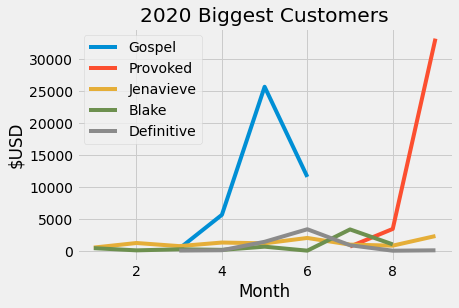

In [32]:
mt = [0,1,2,3,4,5,6,7,8,9,10,11]

cc1 = sm.loc['support@gospelcanvas.com']
cc2 = sm.loc['info@provokedmerch.com']
cc3 = sm.loc['jenavievemklouie@gmail.com']
cc4 = sm.loc['blake@blakejamieson.com']
cc5 = sm.loc['User for definitivejux.myshopify.com']

plt.plot(mt[3:7], cc1, label='Gospel')
plt.plot(mt[7:10], cc2, label='Provoked')
plt.plot(mt[1:10], cc3, label='Jenavieve')
plt.plot(mt[1:9], cc4, label='Blake')
plt.plot(mt[3:10], cc5, label='Definitive')
plt.title('2020 Biggest Customers')
plt.xlabel('Month')
plt.ylabel('$USD')

plt.legend()
plt.show()

# Last 2 Month Best Customers

<AxesSubplot:xlabel='Customer Description'>

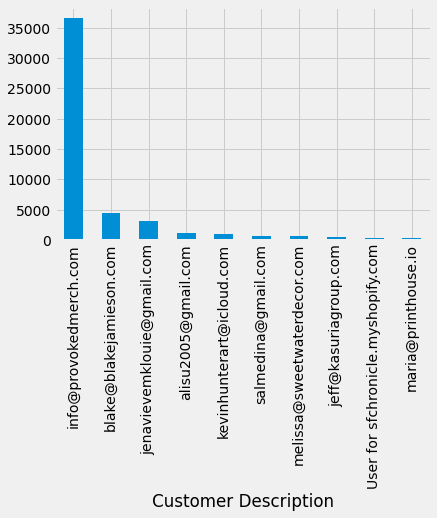

In [33]:
ph[ph['Date']>'2020-08'].groupby('Customer Description')['Money'].sum().sort_values(ascending=False).head(10).plot.bar()

# Biggest relational per year

<AxesSubplot:ylabel='Year'>

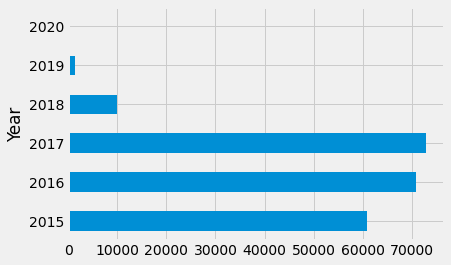

In [41]:
ph.loc['User for evelyn-henson.myshopify.com'].groupby('Year')['Money'].sum().plot.barh()

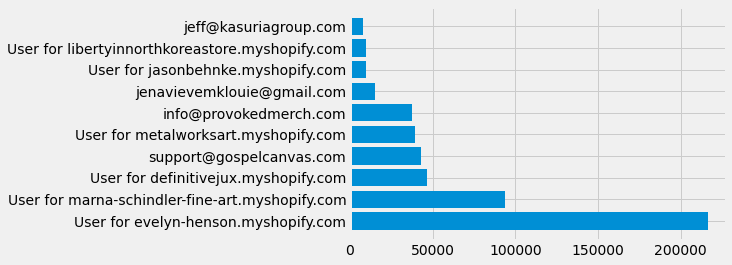

In [85]:
bggg = pd.DataFrame(ph.groupby('Customer Description')['Money'].sum().sort_values(ascending=False).head(10))


x1 = bggg.index
y1 = bggg['Money']

plt.barh(x1,y1)
plt.show()